In [86]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import seaborn as sns 
import matplotlib.pyplot as plt

In [87]:
data = load_breast_cancer()

In [88]:
print(data.target_names)

['malignant' 'benign']


In [89]:
print(data.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [90]:
x = data.data
y = data.target

In [91]:
x.shape,y.shape

((569, 30), (569,))

In [92]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state=1,test_size=0.2)

In [93]:
classifier = svm.SVC(kernel='linear',probability=True,verbose=True)

In [94]:
classifier.fit(X_train,Y_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [95]:
Y_pred = classifier.predict(X_test)
Y_porb = classifier.predict_proba(X_test)

In [96]:
results={}

In [97]:
TP,FN,FP,TN = metrics.confusion_matrix(Y_test,Y_pred,labels=[1,0]).ravel()

In [98]:
results['accuracy'] = (TP+TN)/(TP+TN+FP+FN)
results['precision'] = TP/(TP+FP)
results['recall'] = TP/(TP+FN)
results['F1-score'] = (2*results['precision']*results['recall'])/(results['precision']+results['recall'])
results['mcc'] = ( (TP*TN)-(FP*FN) )/( (TP+FP)*(TP+FN)*(TN+FP)*(TN+FN) )**0.5
results['nege-precision'] = TN/(TN+FN)

In [99]:
print(metrics.accuracy_score(Y_test,Y_pred))
print(metrics.precision_score(Y_test,Y_pred))
print(metrics.recall_score(Y_test,Y_pred))
print(metrics.f1_score(Y_test,Y_pred))
print(metrics.matthews_corrcoef(Y_test,Y_pred))

0.956140350877193
0.935064935064935
1.0
0.9664429530201343
0.907605465436683


In [100]:
print(results)

{'accuracy': 0.956140350877193, 'precision': 0.935064935064935, 'recall': 1.0, 'F1-score': 0.9664429530201343, 'mcc': 0.907605465436683, 'nege-precision': 1.0}


In [101]:
FPRs,TPRs,_ = metrics.roc_curve(Y_test,Y_pred)

In [102]:
print(FPRs,TPRs)

[0.         0.11904762 1.        ] [0. 1. 1.]


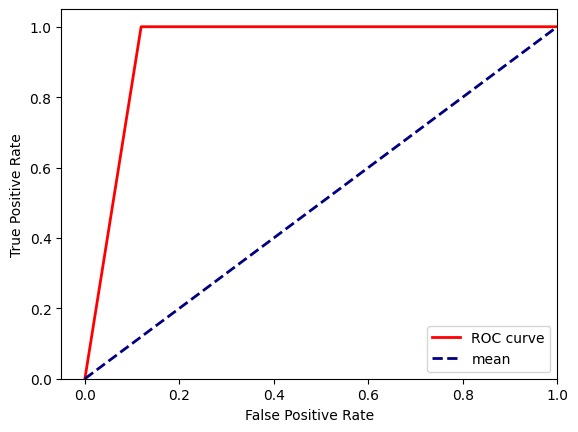

In [103]:
plt.plot(FPRs,TPRs,color='red',lw=2,label="ROC curve")
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--',label="mean")
plt.xlim([-0.05,1.])
plt.ylim([0.0,1.05])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

In [104]:
print(metrics.roc_auc_score(Y_test,Y_pred))

0.9404761904761905
